# Projeto - Relatório de fechamento de mercado por e-mail.
Desafio:
Construir um e-mail que chegue na caixa de entrada todos os dias com informações de fechamento do Ibovespa e dólar.

* Passo 1 - Importar os módulos e bibliotecas.

* Passo 2 - Pegar dados do Banco BTG, Ibovespa e do Dólar no Yahoo Finance.

* Passo 3 - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.

* Passo 4 - Calcular o retorno diário, mensal e anual.

* Passo 5 - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto anexado no e-mail.

* Passo 6 - Fazer os gráficos dos ativos.

In [26]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [8]:
codigos_de_negociacao = ['BPAC11.SA','^BVSP', 'BRL=X']

hoje = datetime.datetime.now()

um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(codigos_de_negociacao,um_ano_atras,hoje)

dados_mercado

[*********************100%***********************]  3 of 3 completed


Adj Close                              Close            \
            BPAC11.SA     BRL=X         ^BVSP  BPAC11.SA     BRL=X   
Date                                                                 
2022-02-10  22.653910  5.234500  113359.00000  23.320000  5.234500   
2022-02-11  22.362482  5.248700  113572.00000  23.020000  5.248700   
2022-02-14  22.683052  5.249956  113807.00000  23.350000  5.249956   
2022-02-15  24.140207  5.214000  114660.00000  24.850000  5.214000   
2022-02-16  24.538498  5.157900  115181.00000  25.260000  5.157900   
...               ...       ...           ...        ...       ...   
2023-02-06  20.100000  5.149800  108456.00000  20.100000  5.149800   
2023-02-07  20.160000  5.145700  107920.00000  20.160000  5.145700   
2023-02-08  20.990000  5.209300  109882.00000  20.990000  5.209300   
2023-02-09  20.790001  5.199500  107783.00000  20.790001  5.199500   
2023-02-10  20.459999       NaN  107825.40625  20.459999       NaN   

                               High                                 Low  \
                   ^BVSP  BPAC11.SA     BRL=X          ^BVSP  BPAC11.SA   
Date                                                                      
2022-02-10  113359.00000  23.570000  5.244600  113812.000000  22.600000   
2022-02-11  113572.00000  23.959999  5.251200  114899.000000  22.860001   
2022-02-14  113807.00000  23.850000  5.263300  114167.000000  23.150000   
2022-02-15  114660.00000  24.950001  5.219900  114819.000000  23.670000   
2022-02-16  115181.00000  25.780001  5.184725  115734.000000  23.820000   
...                  ...        ...       ...            ...        ...   
2023-02-06  108456.00000  20.389999  5.206000  108710.000000  19.650000   
2023-02-07  107920.00000  20.250000  5.205700  109037.000000  19.820000   
2023-02-08  109882.00000  21.230000  5.240100  110175.000000  20.110001   
2023-02-09  107783.00000  21.730000  5.274000  110046.000000  20.760000   
2023-02-10  107825.40625  21.129999       NaN  108646.507812  20.170000   

                                          Open                           \
               BRL=X          ^BVSP  BPAC11.SA     BRL=X          ^BVSP   
Date                                                                      
2022-02-10  5.170000  112163.000000  23.360001  5.231429  112462.000000   
2022-02-11  5.182800  113128.000000  23.450001  5.248600  113368.000000   
2022-02-14  5.195300  113358.000000  23.200001  5.250500  113643.000000   
2022-02-15  5.166288  113882.000000  23.750000  5.213700  113905.000000   
2022-02-16  5.143800  114816.000000  24.900000  5.158000  114830.000000   
...              ...            ...        ...       ...            ...   
2023-02-06  5.147992  107416.000000  20.139999  5.149800  108518.000000   
2023-02-07  5.133384  107234.000000  20.020000  5.145700  108727.000000   
2023-02-08  5.164117  107830.000000  20.190001  5.209300  107832.000000   
2023-02-09  5.170100  107781.000000  21.150000  5.199500  109952.000000   
2023-02-10       NaN  107619.929688  20.670000       NaN  108001.546875   

                Volume                    
             BPAC11.SA BRL=X       ^BVSP  
Date                                      
2022-02-10  12990900.0   0.0  13267900.0  
2022-02-11  11713400.0   0.0  18602800.0  
2022-02-14   7724200.0   0.0  10757600.0  
2022-02-15  11567400.0   0.0  11649600.0  
2022-02-16  22764200.0   0.0  12052100.0  
...                ...   ...         ...  
2023-02-06  17340300.0   0.0  11514600.0  
2023-02-07  11974800.0   0.0  12956300.0  
2023-02-08  18721200.0   0.0  13837000.0  
2023-02-09  11745800.0   0.0  12956000.0  
2023-02-10  11188100.0   NaN         0.0  

[262 rows x 18 columns]

In [9]:
dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['BTG Pactual', 'Dólar', 'Ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,BTG Pactual,Dólar,Ibovespa
Date,,,
2022-02-10,22.653910,5.234500,113359.0
2022-02-11,22.362482,5.248700,113572.0
2022-02-14,22.683052,5.249956,113807.0
2022-02-15,24.140207,5.214000,114660.0
2022-02-16,24.538498,5.157900,115181.0
...,...,...,...
2023-02-03,20.070000,5.049200,108490.0
2023-02-06,20.100000,5.149800,108456.0
2023-02-07,20.160000,5.145700,107920.0


In [11]:
dados_anuais = dados_fechamento.resample("Y").last()

dados_mensais = dados_fechamento.resample('M').last()

dados_anuais
#dados_mensais

,BTG Pactual,Dólar,Ibovespa
Date,,,
2022-12-31,23.769272,5.2668,110031.0
2023-12-31,20.790001,5.1995,107783.0


In [16]:
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

#retorno_anual
retorno_mensal
#retorno_diario

,BTG Pactual,Dólar,Ibovespa
Date,,,
2022-03-31,0.024794,-0.068818,0.060605
2022-04-30,-0.113287,0.035243,-0.101026
2022-05-31,0.087917,-0.037547,0.032213
2022-06-30,-0.111863,0.090165,-0.115033
2022-07-31,0.013895,0.000347,0.046914
2022-08-31,0.139652,-0.011731,0.061629
2022-09-30,-0.025147,0.053554,0.004693
2022-10-31,0.166465,-0.019959,0.054527
2022-11-30,-0.134762,-0.003839,-0.030602


In [20]:
#loc -> referenciar elementos a partir do nome
#iloc -> selecionar elementos como uma matriz

#retorno_jan_26_2022 = retorno_diario.loc['2022-01-26','Dólar']
#retorno_jan_26_2022_iloc = retorno_diario.iloc[1,0]

retorno_diario_btg = retorno_diario.iloc[-1,0] # último item da coluna 0
retorno_diario_dolar = retorno_diario.iloc[-1, 1] # último item da coluna 1
retorno_diario_ibov = retorno_diario.iloc[-1, 2]

retorno_mensal_btg = retorno_mensal.iloc[-1,0] # último item da coluna da coluna 0
retorno_mensal_dolar = retorno_mensal.iloc[-1, 1] # último item da coluna coluna 1
retorno_mensal_ibov = retorno_mensal.iloc[-1, 2]

retorno_anual_btg = retorno_anual.iloc[-1,0]
retorno_anual_dolar = retorno_anual.iloc[-1, 1]
retorno_anual_ibov = retorno_anual.iloc[-1, 2]

print(retorno_anual_dolar)
retorno_anual

-0.012778127851896914


,BTG Pactual,Dólar,Ibovespa
Date,,,
2023-12-31,-0.125341,-0.012778,-0.020431


In [21]:
retorno_diario_btg = round((retorno_diario_btg *100),2)
retorno_diario_dolar = round((retorno_diario_dolar * 100), 2)
retorno_diario_ibov = round((retorno_diario_ibov * 100), 2)

retorno_mensal_btg = round((retorno_mensal_btg * 100),2)
retorno_mensal_dolar = round((retorno_mensal_dolar * 100), 2)
retorno_mensal_ibov = round((retorno_mensal_ibov * 100), 2) 

retorno_anual_brg = round((retorno_anual_btg * 100),2)
retorno_anual_dolar = round((retorno_anual_dolar * 100), 2)
retorno_anual_ibov = round((retorno_anual_ibov * 100), 2)

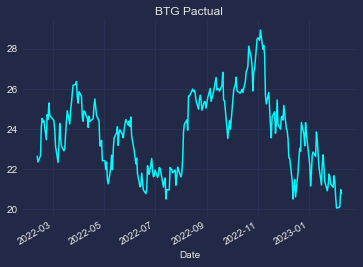

In [24]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "BTG Pactual", use_index = True, legend = False)

plt.title("BTG Pactual")

plt.savefig('btg.png', dpi = 300)

plt.show()

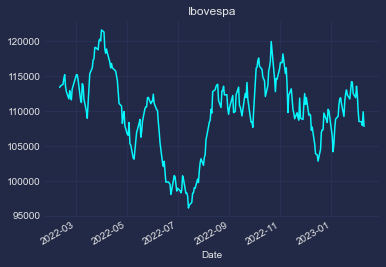

In [23]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "Ibovespa", use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

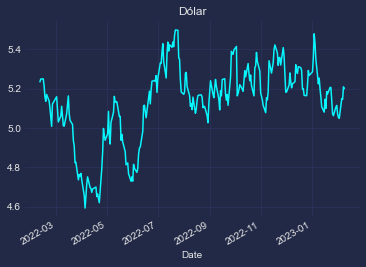

In [25]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "Dólar", use_index = True, legend = False)

plt.title("Dólar")

plt.savefig('dolar.png', dpi = 300)

plt.show()